<a href="https://colab.research.google.com/github/Kang-Inprogress/-ML/blob/main/%ED%98%BC%EA%B3%B5ML_3%EC%B1%95%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 알고리즘과 모델 규제

> k-nn 회귀

회귀: 한 바퀴 돌아서 본디의 자리나 상태로 돌아오는 것. 순화어는 `돌아옴'.

In [ ]:
import numpy as np

# 데이터의 준비

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

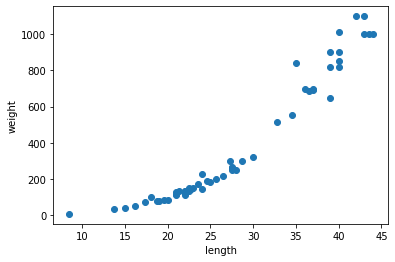

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 나눔

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1) # 배열을 2차원으로 변경하고, 1개의 열을 가지는 행이 원소 개수만큼 존재하게 끔 변형됨

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(test_input, test_target)) # score에서 출력값은 1에 가까울 수록 좋은 것이다. 분류에서는 정확도를, 회귀에서는 결정 계수를 뜻한다

0.9928094061010639


결정 계수를 대신해서 측정을 도와주는 도구

결정 계수와 이러한 것들은 성능 지표가 되어 준다

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 과대적합과 과소적합

훈련 세트의 점수 > 테스트 세트 점수: 과대 적합

훈련 세트의 점수 < 테스트 세트 점수 **또는** 두 점수가 모두 낮을 때: 과소 적합

> 과소 적합의 해결

모델을 조금 더 복잡하게 만든다. 여기서는 K-nn을 사용하였으므로 이웃의 개수를 줄여서 모델을 데이터 패턴에 더 민감하게 만드는 방법이 있다.


> 과대 적합의 해결

모델을 덜 복잡하게 만들어야한다. 모델의 파라미터 수가 더 적은 모델을 사용하거나, 모델에 제약, 더 많은 훈련 데이터의 확보 등이 있다. k-nn의 경우에는 이웃의 갯수를 늘리는 것.






---


k-nn알고리즘은 한계가 있다. 예를 들어, 농어와 빙어의 데이터 셋에 농어의 길이가 50cm인 데이터가 새로 들어온다면 기존에 있던 농어의 길이보다는 훨씬 길지만 무게는 크게 다르지 않은 값이 나올것이다. 그 이유는 k-nn이 근처의 이웃의 값을 참고해서 예측하기 때문이다. 그러므로 이런 상황에서는 우리는 알고리즘을 바꿀 필요가 있을 것이다.

# 선형회귀
널리 사용되는 대표적인 회귀 알고리즘이다. 어떤 **직선**을 학습한다.



In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

# print(lr.coef_, lr.intercept_) 모델이 학습하여 구한 파라미터를 출력

[1241.83860323]
[39.01714496] -709.0186449535477


# 다항회귀
차원을 올린 선형 방정식 정도로 이해하자

위의 데이터 셋 기준으로 길이를 제곱한 항이 훈련세트에 추가되어야 한다.

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
# 다항으로 변경된 테스트 셋으로 다시 훈련
lr = LinearRegression()

lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

# print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


**특성을 제곱한 것에 이름을 부여해서 다른 특성으로 치부한다면, 기존의 특성과 새로운 특성하나가 추가되어서 선형적인 관계를 가질 수 있으므로 선형 회귀라는 의미가 훼손되지 않는다**

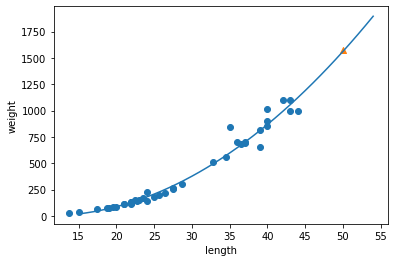

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15, 55)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05) # 다항회귀로 학습한 그래프: 무게 = 1.01 x 길이x길이 - 21.6 x 길이 + 116.05

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 특성 공학


In [ ]:
# 판다스


# 사이킷런의 변환기로 변환
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5) # include_bias = False 옵션은 Default
# poly.fit(train_input)
# train_poly = poly.transform(train_input)
# print(train_poly.shape)

train_poly = poly.fit_transform(train_input) # fit과 transform을 합친 함수
# print(train_poly.shape, poly.get_feature_names())
test_poly = poly.fit_transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9739334260896343
0.9825340925888683


# 규제
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것

[예] 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다

In [ ]:
# 데이터의 준비(PolynomialFeatures로 만든 train_poly 등을 사용)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**Ridge 릿지**

계수를 제곱한 값을 기준으로 규제를 적용

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9675257933461249


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9665833996552661


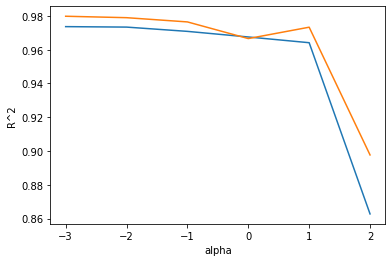

[0.9736543234476451, 0.9733770960543661, 0.9708464608091913, 0.9675257933461249, 0.9641329386626265, 0.8627487881080745] 
 [0.9798046964920939, 0.9789530910605554, 0.9764445172290547, 0.9665833996552661, 0.9733177545575481, 0.8976726580323618]


In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

print(train_score, "\n", test_score)

**Lasso 라쏘**

계수의 절댓값을 기준으로 규제를 적용

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9692636157789122


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9718691066691287


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68371.36027450048, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60897.25696900669, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19450.81478042998, tolerance: 518.2793833333334
  positive)


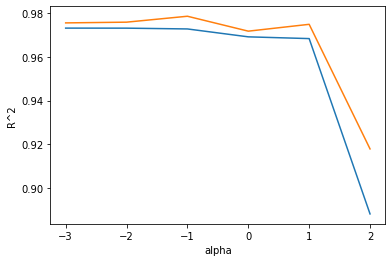

[0.9732647559337357, 0.973245622077268, 0.9728858940077052, 0.9692636157789122, 0.9684606645363231, 0.8880500221451817] 
 [0.9756595783526614, 0.9759957561350031, 0.9787105890743735, 0.9718691066691287, 0.9750054278589299, 0.917866091243881]


In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

print(train_score, "\n", test_score)

lasso는 계수를 0으로도 만들 수 있는 비용 함수를 가지고 있기 때문에 유용한 특성을 골라내는 용도로 사용할 수 있다.


In [ ]:
print(np.sum(lasso.coef_ == 0)) # 계수가 0이된 특성의 개수

4
